# Flood Prediction Machine Learning Model

#Introduction:
Natural disasters, such as floods, can have devastating impacts on communities, infrastructure, and the environment. 
In recent years, the state of Kerala in India has experienced significant challenges related to flooding during the monsoon 
season. Understanding and predicting these events are crucial for effective disaster management and preparedness. 
This project aims to contribute to the efforts in Kerala flood prediction using a comprehensive dataset that includes 
various meteorological parameters.
 


#Problem Statement:
Kerala, known for its monsoon rains, is prone to annual floods that cause significant damage to life and property. T
he goal of this project is to develop a robust predictive model for Kerala flood prediction using historical meteorological data
The dataset comprises information on rainfall in different months, annual rainfall, and a binary indicator for the occurrence
of floods.



In [1]:
# It will list the files in the input directory.
import pandas as pd
df=pd.read_csv("kerala.csv")  # Name of the project Directory

In [2]:
# Ignoring Warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('kerala.csv')
print(df)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [4]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [5]:
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [6]:
#Finding number of missing values

In [7]:
df.isnull().sum()  # cheaking if any colomns is left empty or not.

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [8]:
#Analyzing the Dataset

In [9]:
print(df.shape)

(118, 16)


In [10]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [11]:
df.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


# Exploratory Data Analysis

In [12]:
# replacing the yes/no in floods coloumn by 1/0
df['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

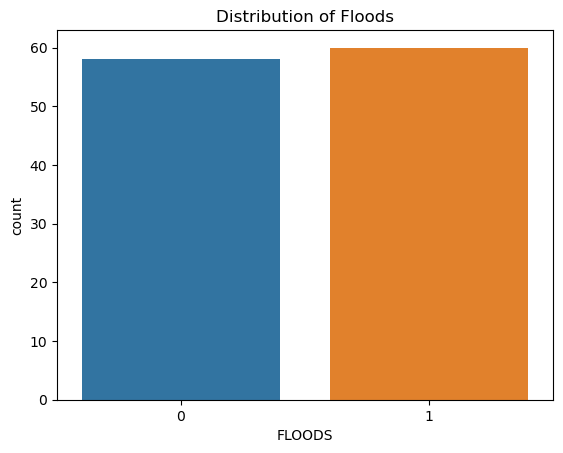

In [13]:
# Visualize the distribution of the target variable (FLOODS)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='FLOODS', data=df)
plt.title('Distribution of Floods')
plt.show()

we can see that the count plot visually represents the distribution of the target variable "FLOODS," 
showcasing the frequency of occurrence for each category (e.g., 0 for no floods, 1 for floods).


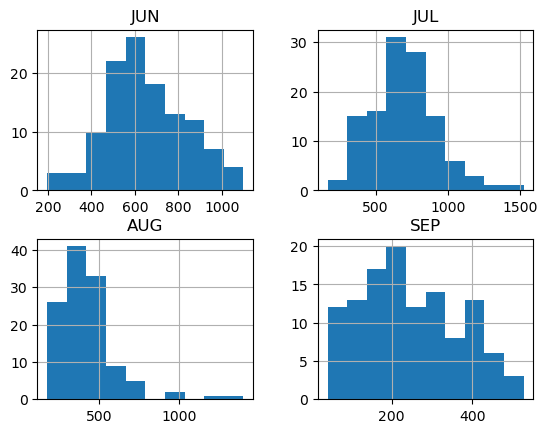

In [14]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
get_ipython().run_line_magic('matplotlib', 'inline')
c = df[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

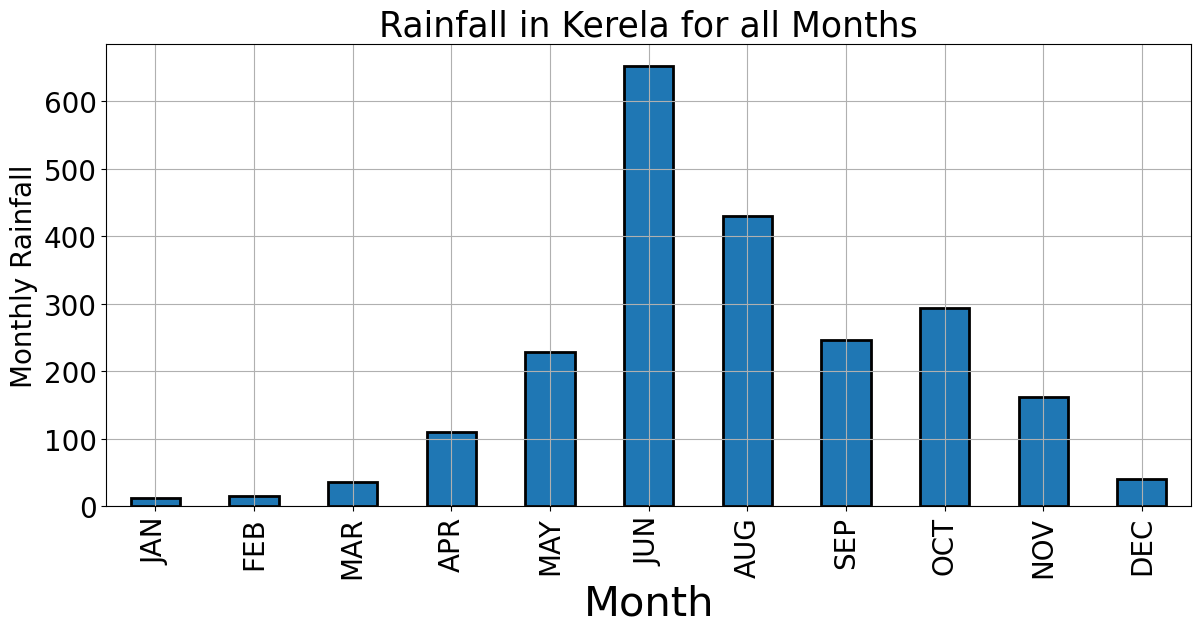

In [15]:
ax = df[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerela for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

we can see that the bar plot illustrates the average monthly rainfall in Kerala across different months. It clearly shows a distinct peak in rainfall during the monsoon season from June to September, highlighting the concentrated period of intense rainfall.

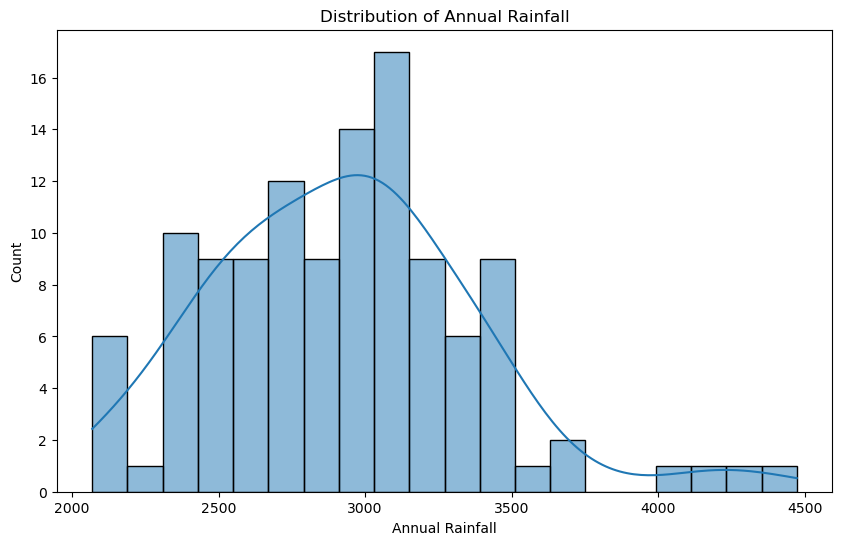

In [16]:
 #Visualize the distribution of annual rainfall
plt.figure(figsize=(10, 6))
sns.histplot(df[' ANNUAL RAINFALL'], bins=20, kde=True)  # Corrected variable name
plt.title('Distribution of Annual Rainfall')
plt.xlabel('Annual Rainfall')
plt.show()


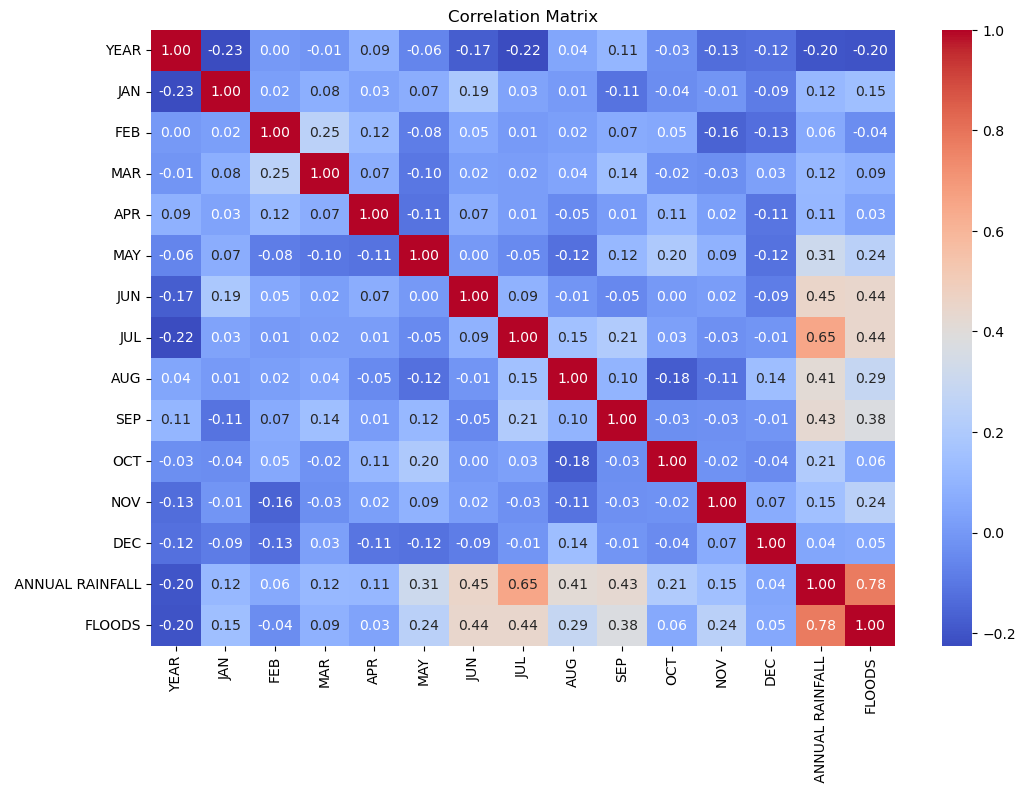

In [17]:
# Explore the correlation between different columns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

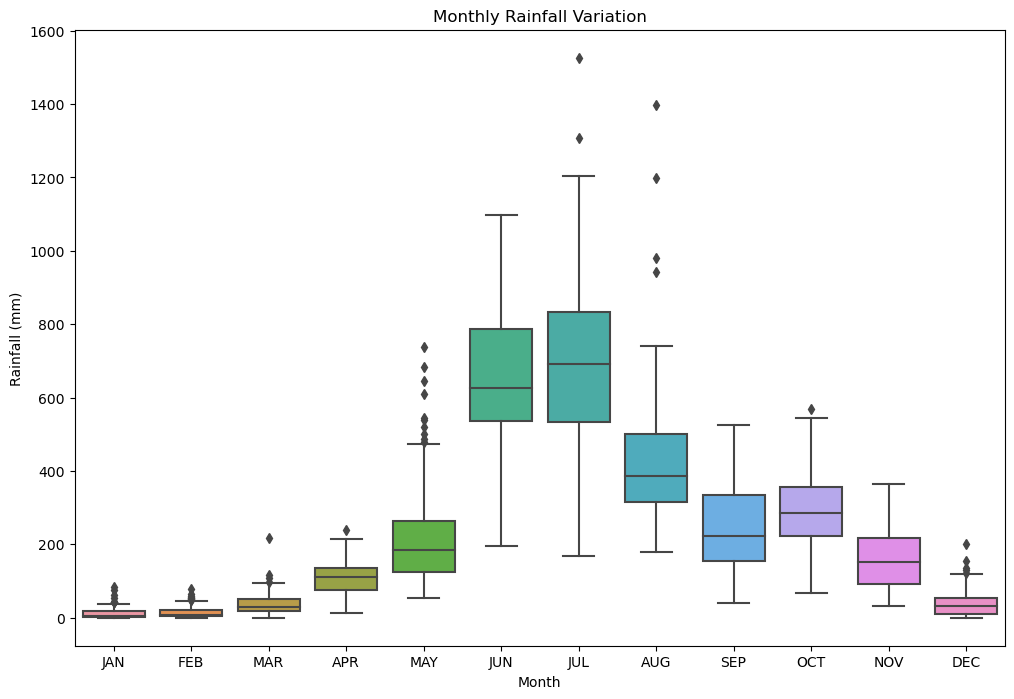

In [18]:
# Explore the variation in rainfall across different months
month_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
data_monthly = df[month_columns]

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_monthly, width=0.8)
plt.title('Monthly Rainfall Variation')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()

In [19]:
# Assuming 'data' is your DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[outliers]


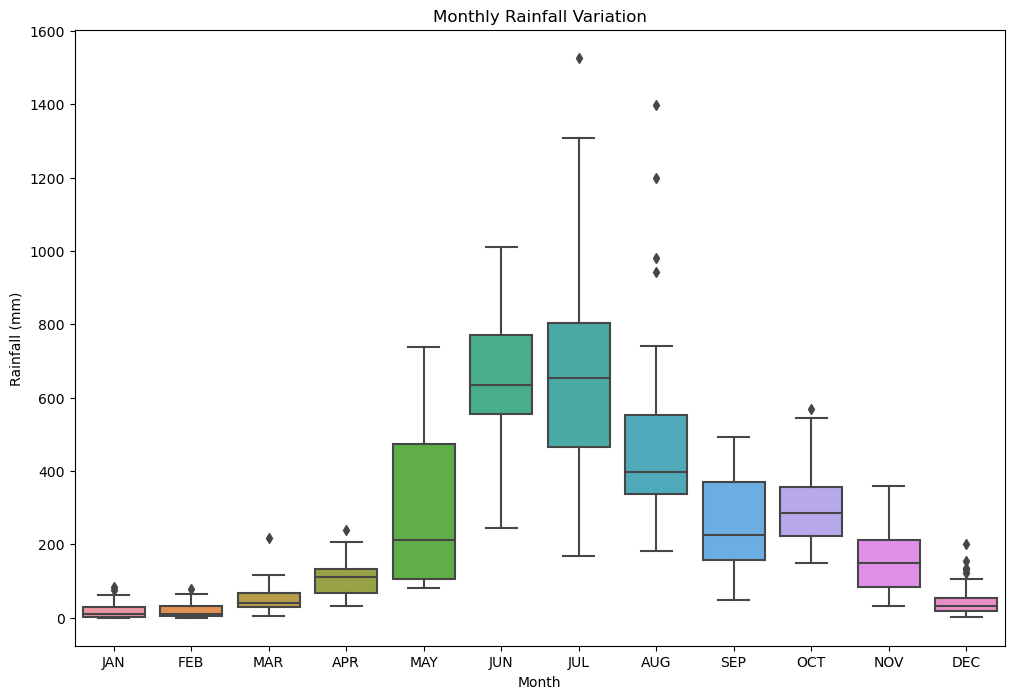

In [20]:
# Explore the variation in rainfall across different months
month_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
data_monthly = df[month_columns]

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_monthly, width=0.8)
plt.title('Monthly Rainfall Variation')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()

In [21]:
# Seperating the data which we are gonna use for prediction.
x=df.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
6,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8
8,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3
13,1914,0.7,6.8,18.1,32.7,164.2,565.3,857.7,402.2,241.0,374.4,100.9,135.2
16,1917,2.9,47.6,79.4,38.1,122.9,703.7,342.7,335.1,470.3,264.1,256.4,41.6


In [22]:
# Now seperate the flood label from the dataset.
y=df.iloc[:,-1]
y

1      1
6      1
8      1
13     0
16     0
17     0
18     1
20     0
22     1
23     1
27     0
30     1
31     1
32     1
33     0
35     1
37     0
42     1
45     1
46     1
47     1
49     1
51     0
54     1
59     1
60     1
61     1
64     0
67     1
83     0
84     0
86     0
89     0
98     0
99     0
100    0
102    0
103    0
105    1
107    0
117    1
Name: FLOODS, dtype: int64

# Using sklearn to develop the ML Model

In [23]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.07913669, 0.0292249 , 0.24894317, 0.24939113,
        0.08272617, 0.19040167, 0.76342899, 0.10899967, 1.        ,
        0.49952222, 0.38836141, 0.59700748],
       [0.04310345, 0.22422062, 0.05717916, 0.2414279 , 0.67267414,
        0.0324833 , 0.68596766, 0.43627667, 0.65663047, 0.3984657 ,
        0.38318204, 0.57457887, 0.25436409],
       [0.06034483, 0.64748201, 0.14612452, 0.26773133, 0.29761325,
        0.59684274, 0.59963485, 0.45239146, 0.06145114, 0.3316787 ,
        0.15002389, 0.42756508, 0.1521197 ],
       [0.10344828, 0.00719424, 0.08259212, 0.06481916, 0.        ,
        0.12780814, 0.41784038, 0.50787344, 0.18007568, 0.43456679,
        0.53774486, 0.21255743, 0.66533666],
       [0.12931034, 0.03357314, 0.60101652, 0.35274777, 0.02630297,
        0.0651184 , 0.59833073, 0.12891832, 0.1248766 , 0.95194043,
        0.27424749, 0.68882083, 0.19850374],
       [0.13793103, 0.51318945, 0.05972046, 0.13386566, 0.09059912,
        0.91530055, 0.28612

In [24]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Load your DataFrame here if it's not already loaded

# Select only the columns containing numerical data (excluding 'YEAR' and 'FLOODS' columns)
numeric_columns = df.columns[2:-2]

# Apply min-max normalization to the selected columns
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())

# Display the normalized DataFrame
print(df)


    SUBDIVISION  YEAR       JAN       FEB       MAR       APR       MAY  \
1        KERALA  1902  0.079137  0.029225  0.248943  0.249391  0.082726   
6        KERALA  1907  0.224221  0.057179  0.241428  0.672674  0.032483   
8        KERALA  1909  0.647482  0.146125  0.267731  0.297613  0.596843   
13       KERALA  1914  0.007194  0.082592  0.064819  0.000000  0.127808   
16       KERALA  1917  0.033573  0.601017  0.352748  0.026303  0.065118   
17       KERALA  1918  0.513189  0.059720  0.133866  0.090599  0.915301   
18       KERALA  1919  0.514388  0.073698  0.139032  0.161715  0.253491   
20       KERALA  1921  0.514388  0.055909  0.050258  0.675110  0.036582   
22       KERALA  1923  0.294964  0.005083  0.350399  0.052606  0.000000   
23       KERALA  1924  0.230216  0.033037  0.292626  0.381393  0.159988   
27       KERALA  1928  0.151079  0.833545  0.220761  0.430589  0.002884   
30       KERALA  1931  0.038369  0.000000  0.069986  0.458841  0.078476   
31       KERALA  1932  0.

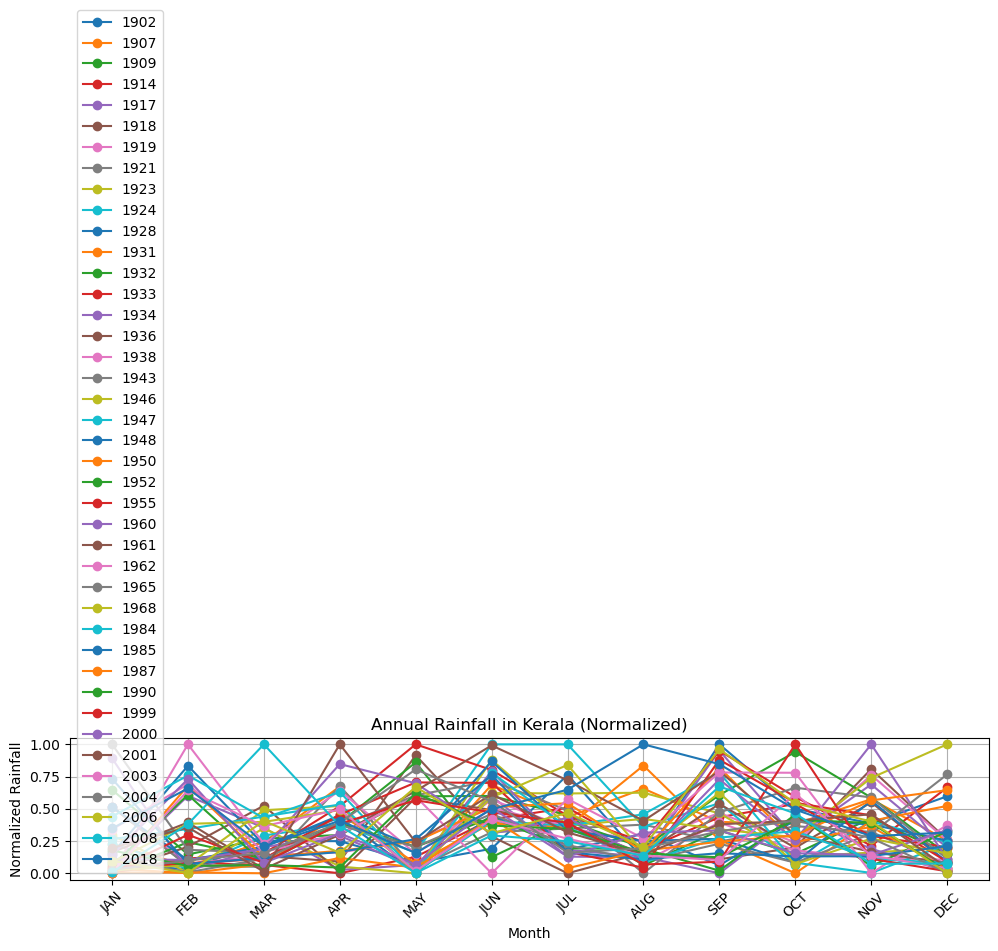

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Load your DataFrame here if it's not already loaded

# Select only the columns containing numerical data (excluding 'YEAR' and 'FLOODS' columns)
numeric_columns = df.columns[2:-2]

# Apply min-max normalization to the selected columns
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())

# Plotting annual rainfall for each year
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    plt.plot(df.columns[2:-2], row[2:-2], marker='o', label=str(row['YEAR']))
    if row['FLOODS'] == 'YES':
        plt.text(row['YEAR'], max(row[2:-2]), 'Flood', fontsize=9, color='red')

plt.title('Annual Rainfall in Kerala (Normalized)')
plt.xlabel('Month')
plt.ylabel('Normalized Rainfall')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


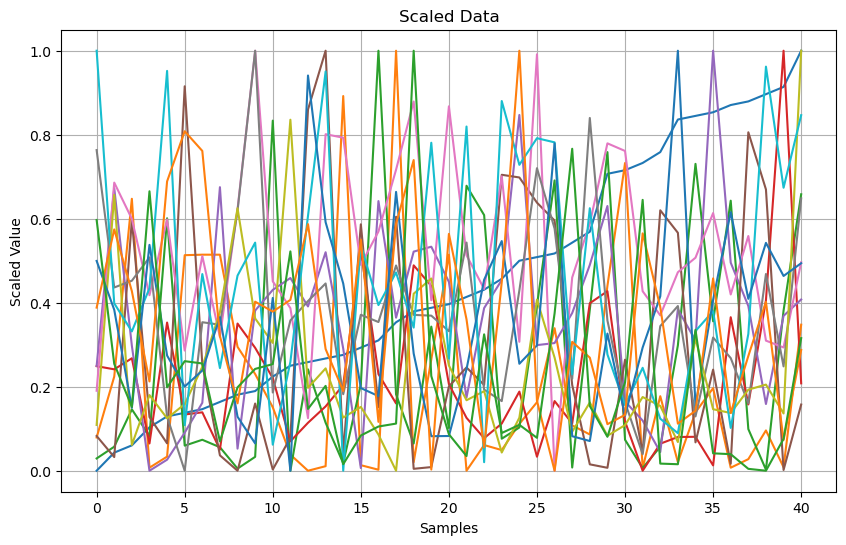

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming x is your dataset
# Initialize MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = minmax.fit_transform(x)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(scaled_data)
plt.title('Scaled Data')
plt.xlabel('Samples')
plt.ylabel('Scaled Value')
plt.grid(True)
plt.show()

In [27]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
84,1985,61.2,6.1,29.3,66.6,254.2,828.7,388.9,315.3,117.6,204.0,74.9,44.0
31,1932,0.1,19.3,28.6,113.0,646.5,341.0,716.4,423.2,317.3,543.2,223.2,31.3
89,1990,14.9,4.8,18.0,41.8,488.5,528.6,635.4,370.8,103.3,323.2,158.8,5.2
42,1943,83.5,14.6,38.4,107.5,478.4,794.5,831.6,183.3,257.6,427.2,223.4,24.3
22,1923,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6


In [28]:
x_train.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [29]:
x_test.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [30]:
# type casting.
y_train=y_train.astype('int')
y_train

84     0
31     1
89     0
42     1
22     1
6      1
105    1
13     0
60     1
64     0
61     1
20     0
8      1
47     1
30     1
32     1
98     0
54     1
18     1
1      1
51     0
16     0
107    0
46     1
37     0
45     1
102    0
23     1
17     0
99     0
59     1
86     0
Name: FLOODS, dtype: int32

In [31]:
y_test=y_test.astype('int')
y_test

49     1
67     1
33     0
35     1
100    0
117    1
103    0
27     0
83     0
Name: FLOODS, dtype: int32

# Logistic Regression to predict

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [33]:
df = pd.read_csv('kerala.csv')
print(df)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [34]:
 #Prepare the features (X) and target variable (y)
X = df.iloc[:, 2:14]  # Select columns JAN to DEC as features
y = df['FLOODS']
 #Split the data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)


# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report_str)


Accuracy: 0.62

Confusion Matrix:
[[8 2]
 [7 7]]

Classification Report:
              precision    recall  f1-score   support

          NO       0.53      0.80      0.64        10
         YES       0.78      0.50      0.61        14

    accuracy                           0.62        24
   macro avg       0.66      0.65      0.62        24
weighted avg       0.68      0.62      0.62        24



In [36]:
coefficients = logreg_model.coef_
intercept = logreg_model.intercept_

# Display the coefficients
print('Coefficients:')
print(coefficients)
print('\nIntercept:', intercept)

Coefficients:
[[-0.00086025 -0.00565223 -0.00069089  0.00083604  0.00411803  0.00116343
   0.00128641  0.00135538  0.00314583 -0.00737836  0.0023169   0.00235036]]

Intercept: [-2.36875466]


# Decision Tree Classification to Predict

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the features (X) and target variable (y)
X = df.iloc[:, 2:14]  # Select columns JAN to DEC as features
y = df['FLOODS']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)


In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report_str)


Accuracy: 0.83

Confusion Matrix:
[[ 8  2]
 [ 2 12]]

Classification Report:
              precision    recall  f1-score   support

          NO       0.80      0.80      0.80        10
         YES       0.86      0.86      0.86        14

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



In [40]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Initialize the decision tree model
decision_tree_model = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Export the decision tree as text
tree_rules = export_text(decision_tree_model, feature_names=list(X_train.columns))

# Display the decision tree rules
print(tree_rules)


|--- JUN <= 618.10
|   |--- SEP <= 296.00
|   |   |--- NOV <= 287.10
|   |   |   |--- AUG <= 920.55
|   |   |   |   |--- class: NO
|   |   |   |--- AUG >  920.55
|   |   |   |   |--- class: YES
|   |   |--- NOV >  287.10
|   |   |   |--- APR <= 76.80
|   |   |   |   |--- class: NO
|   |   |   |--- APR >  76.80
|   |   |   |   |--- class: YES
|   |--- SEP >  296.00
|   |   |--- MAY <= 207.10
|   |   |   |--- JAN <= 5.00
|   |   |   |   |--- class: NO
|   |   |   |--- JAN >  5.00
|   |   |   |   |--- class: YES
|   |   |--- MAY >  207.10
|   |   |   |--- class: YES
|--- JUN >  618.10
|   |--- JUL <= 486.95
|   |   |--- AUG <= 294.35
|   |   |   |--- class: YES
|   |   |--- AUG >  294.35
|   |   |   |--- class: NO
|   |--- JUL >  486.95
|   |   |--- FEB <= 56.85
|   |   |   |--- JAN <= 0.05
|   |   |   |   |--- DEC <= 24.20
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- DEC >  24.20
|   |   |   |   |   |--- class: NO
|   |   |   |--- JAN >  0.05
|   |   |   |   |--- AUG <= 212.8

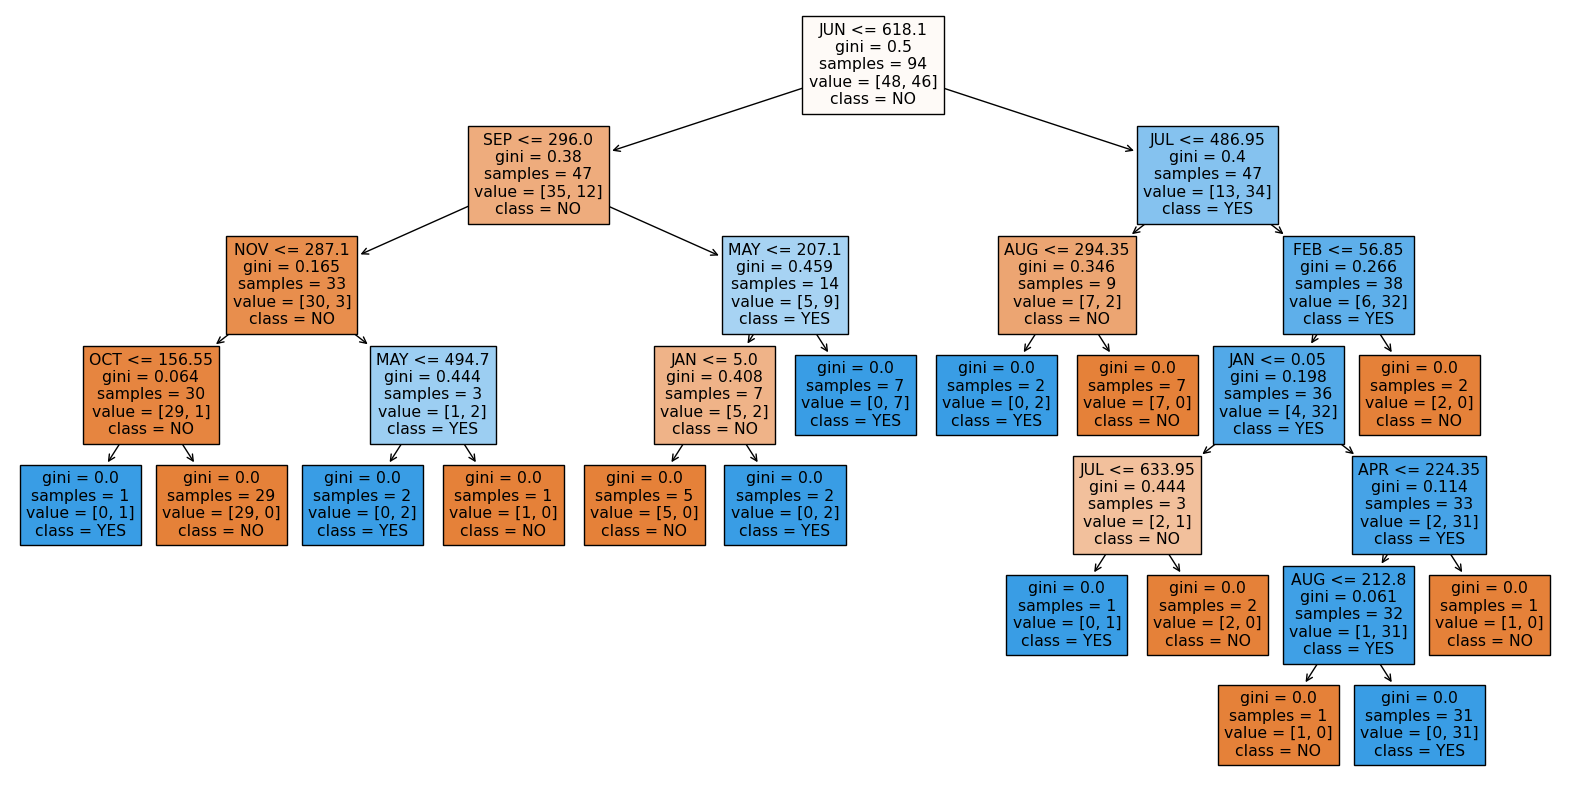

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize the decision tree model
decision_tree_model = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Convert Index object to a list
feature_names = list(X.columns)

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(decision_tree_model, feature_names=feature_names, class_names=['NO', 'YES'], filled=True)
plt.show()


# ## Random forest classifier

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# Prepare the features (X) and target variable (y)
X = df.iloc[:, 2:14]  # Select columns JAN to DEC as features
y = df['FLOODS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Prepare the features (X) and target variable (y)
X = df.iloc[:, 2:14]  # Select columns JAN to DEC as features
y = df['FLOODS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report_str)

Accuracy: 0.92

Confusion Matrix:
[[ 9  1]
 [ 1 13]]

Classification Report:
              precision    recall  f1-score   support

          NO       0.90      0.90      0.90        10
         YES       0.93      0.93      0.93        14

    accuracy                           0.92        24
   macro avg       0.91      0.91      0.91        24
weighted avg       0.92      0.92      0.92        24



In [45]:
# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Display the feature importances
print('\nFeature Importances:')
print(feature_importances)


Feature Importances:
[0.0597941  0.03698173 0.0471844  0.03693041 0.08927148 0.18399837
 0.15497701 0.0843536  0.15146101 0.03517742 0.07584343 0.04402704]


# KNN classifier to predict

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the features (X) and target variable (y)
X = df.iloc[:, 2:14]  # Select columns JAN to DEC as features
y = df['FLOODS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier model
knn_model = KNeighborsClassifier()

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
Confusion Matrix:
[[ 9  1]
 [ 3 11]]
Classification Report:
              precision    recall  f1-score   support

          NO       0.75      0.90      0.82        10
         YES       0.92      0.79      0.85        14

    accuracy                           0.83        24
   macro avg       0.83      0.84      0.83        24
weighted avg       0.85      0.83      0.83        24



# Support Vector Classification to predict

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the features (X) and target variable (y)
X = df.iloc[:, 2:14]  # Select columns JAN to DEC as features
y = df['FLOODS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVC model
svc_model = SVC()

# Fit the model on the training data
svc_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = svc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.875
Confusion Matrix:
[[ 8  2]
 [ 1 13]]
Classification Report:
              precision    recall  f1-score   support

          NO       0.89      0.80      0.84        10
         YES       0.87      0.93      0.90        14

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.87        24
weighted avg       0.88      0.88      0.87        24



# Comparing all the prediction models

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [49]:
# Prepare the features (X) and target variable (y)
X = df.iloc[:, 2:14]  # Select columns JAN to DEC as features
y = df['FLOODS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='YES')
    recall = recall_score(y_test, y_pred, pos_label='YES')
    f1 = f1_score(y_test, y_pred, pos_label='YES')
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Confusion Matrix": cm
    }

# Print results
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1-score: {metrics['F1-score']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])


Logistic Regression:
Accuracy: 0.62
Precision: 0.78
Recall: 0.50
F1-score: 0.61
Confusion Matrix:
[[8 2]
 [7 7]]

Decision Tree:
Accuracy: 0.83
Precision: 0.86
Recall: 0.86
F1-score: 0.86
Confusion Matrix:
[[ 8  2]
 [ 2 12]]

Random Forest:
Accuracy: 0.92
Precision: 0.93
Recall: 0.93
F1-score: 0.93
Confusion Matrix:
[[ 9  1]
 [ 1 13]]

KNN:
Accuracy: 0.83
Precision: 0.92
Recall: 0.79
F1-score: 0.85
Confusion Matrix:
[[ 9  1]
 [ 3 11]]

SVC:
Accuracy: 0.88
Precision: 0.87
Recall: 0.93
F1-score: 0.90
Confusion Matrix:
[[ 8  2]
 [ 1 13]]


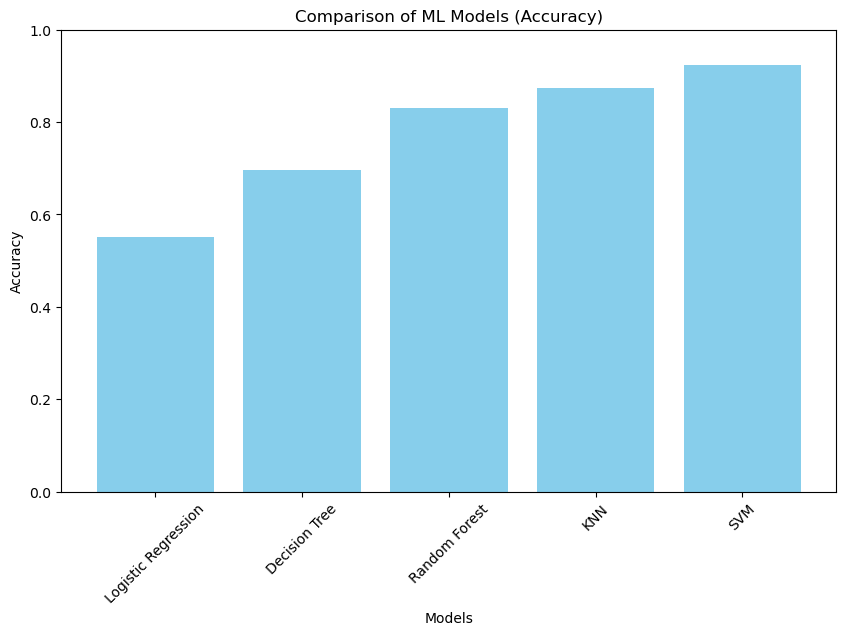

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[name] = scores.mean()

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Models (Accuracy)')
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.xticks(rotation=45)
plt.show()